In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('air_data.csv',encoding='utf-8')
data.head()


,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,ADD_Point_SUM,Eli_Add_Point_Sum,L1Y_ELi_Add_Points,Points_Sum,L1Y_Points_Sum,Ration_L1Y_Flight_Count,Ration_P1Y_Flight_Count,Ration_P1Y_BPS,Ration_L1Y_BPS,Point_NotFlight
0,54993,2006/11/2,2008/12/24,男,6,.,北京,CN,31.0,2014/3/31,...,39992,114452,111100,619760,370211,0.509524,0.490476,0.487221,0.512777,50
1,28065,2007/2/19,2007/8/3,男,6,NaN,北京,CN,42.0,2014/3/31,...,12000,53288,53288,415768,238410,0.514286,0.485714,0.489289,0.510708,33
2,55106,2007/2/1,2007/8/30,男,6,.,北京,CN,40.0,2014/3/31,...,15491,55202,51711,406361,233798,0.518519,0.481481,0.481467,0.518530,26
3,21189,2008/8/22,2008/8/23,男,5,Los Angeles,CA,US,64.0,2014/3/31,...,0,34890,34890,372204,186100,0.434783,0.565217,0.551722,0.448275,12
4,39546,2009/4/10,2009/4/15,男,6,贵阳,贵州,CN,48.0,2014/3/31,...,22704,64969,64969,338813,210365,0.532895,0.467105,0.469054,0.530943,39


In [3]:
explore  = data.describe().T
explore['null'] = len(data) - explore['count']
explore['null']

MEMBER_NO                    0.0
FFP_TIER                     0.0
AGE                        420.0
FLIGHT_COUNT                 0.0
BP_SUM                       0.0
EP_SUM_YR_1                  0.0
EP_SUM_YR_2                  0.0
SUM_YR_1                   551.0
SUM_YR_2                   138.0
SEG_KM_SUM                   0.0
WEIGHTED_SEG_KM              0.0
AVG_FLIGHT_COUNT             0.0
AVG_BP_SUM                   0.0
BEGIN_TO_FIRST               0.0
LAST_TO_END                  0.0
AVG_INTERVAL                 0.0
MAX_INTERVAL                 0.0
ADD_POINTS_SUM_YR_1          0.0
ADD_POINTS_SUM_YR_2          0.0
EXCHANGE_COUNT               0.0
avg_discount                 0.0
P1Y_Flight_Count             0.0
L1Y_Flight_Count             0.0
P1Y_BP_SUM                   0.0
L1Y_BP_SUM                   0.0
EP_SUM                       0.0
ADD_Point_SUM                0.0
Eli_Add_Point_Sum            0.0
L1Y_ELi_Add_Points           0.0
Points_Sum                   0.0
L1Y_Points

In [4]:
explore = explore[['null','max','min']]
explore.columns = ['空值数量','最大值','最小值']
explore

,空值数量,最大值,最小值
MEMBER_NO,0.0,62988.000000,1.00
FFP_TIER,0.0,6.000000,4.00
AGE,420.0,110.000000,6.00
FLIGHT_COUNT,0.0,213.000000,2.00
BP_SUM,0.0,505308.000000,0.00
EP_SUM_YR_1,0.0,0.000000,0.00
EP_SUM_YR_2,0.0,74460.000000,0.00
SUM_YR_1,551.0,239560.000000,0.00
SUM_YR_2,138.0,234188.000000,0.00
SEG_KM_SUM,0.0,580717.000000,368.00


In [5]:
data_notnull = data.loc[data['SUM_YR_1'].notnull() & data['SUM_YR_2'].notnull(),:]
print("获取删除缺失值后的数据形状：",data_notnull.shape)

获取删除缺失值后的数据形状： (62299, 44)


In [6]:
# 保留票价非零的数据，或者是平均折扣率不为0且飞行里程数大于0的记录
index1 = data_notnull['SUM_YR_1'] != 0
index2 = data_notnull['SUM_YR_2'] != 0
index3 = (data_notnull['avg_discount'] != 0) &(data_notnull['SEG_KM_SUM'] > 0)
# 去除掉年龄大于100岁的客户
index4 = data_notnull['AGE'] > 100
data_fliter = data_notnull[(index1 | index2) & index3 & ~index4]
print("数据清洗后的形状",data_fliter.shape)

数据清洗后的形状 (62043, 44)


In [7]:
data.columns

Index(['MEMBER_NO', 'FFP_DATE', 'FIRST_FLIGHT_DATE', 'GENDER', 'FFP_TIER',
       'WORK_CITY', 'WORK_PROVINCE', 'WORK_COUNTRY', 'AGE', 'LOAD_TIME',
       'FLIGHT_COUNT', 'BP_SUM', 'EP_SUM_YR_1', 'EP_SUM_YR_2', 'SUM_YR_1',
       'SUM_YR_2', 'SEG_KM_SUM', 'WEIGHTED_SEG_KM', 'LAST_FLIGHT_DATE',
       'AVG_FLIGHT_COUNT', 'AVG_BP_SUM', 'BEGIN_TO_FIRST', 'LAST_TO_END',
       'AVG_INTERVAL', 'MAX_INTERVAL', 'ADD_POINTS_SUM_YR_1',
       'ADD_POINTS_SUM_YR_2', 'EXCHANGE_COUNT', 'avg_discount',
       'P1Y_Flight_Count', 'L1Y_Flight_Count', 'P1Y_BP_SUM', 'L1Y_BP_SUM',
       'EP_SUM', 'ADD_Point_SUM', 'Eli_Add_Point_Sum', 'L1Y_ELi_Add_Points',
       'Points_Sum', 'L1Y_Points_Sum', 'Ration_L1Y_Flight_Count',
       'Ration_P1Y_Flight_Count', 'Ration_P1Y_BPS', 'Ration_L1Y_BPS',
       'Point_NotFlight'],
      dtype='object')

# LRFMC
- L （关系长度）= LOAD_TIME - FFP_DATE
- R  (消费的时间间隔）= LAST_TO_END
- F  (消费频率) = FLIGHT_COUNT
- M  (飞行里程) = SEG_KM_SUM
- C  (折扣率的平均值）= avg_discount

In [8]:
data_fliter.to_csv('fliter.csv')

In [9]:
# 数据的预处理
airline = pd.read_csv('fliter.csv')
airline_selection = airline[['LOAD_TIME','FFP_DATE','LAST_TO_END','FLIGHT_COUNT','SEG_KM_SUM','avg_discount']]
airline_selection.head()

,LOAD_TIME,FFP_DATE,LAST_TO_END,FLIGHT_COUNT,SEG_KM_SUM,avg_discount
0,2014/3/31,2006/11/2,1,210,580717,0.961639
1,2014/3/31,2007/2/19,7,140,293678,1.252314
2,2014/3/31,2007/2/1,11,135,283712,1.254676
3,2014/3/31,2008/8/22,97,23,281336,1.090870
4,2014/3/31,2009/4/10,5,152,309928,0.970658


In [10]:
L = pd.to_datetime(airline_selection['LOAD_TIME']) - pd.to_datetime(airline_selection['FFP_DATE'])
L

0       2706 days
1       2597 days
2       2615 days
3       2047 days
4       1816 days
           ...   
62038   3249 days
62039   1961 days
62040   1362 days
62041    466 days
62042   1082 days
Length: 62043, dtype: timedelta64[ns]

In [11]:
L = L.astype('str').str.split().str[0]
L

0        2706
1        2597
2        2615
3        2047
4        1816
         ... 
62038    3249
62039    1961
62040    1362
62041     466
62042    1082
Length: 62043, dtype: object

In [12]:
L = L.astype('int') / 30
L.head()

0    90.200000
1    86.566667
2    87.166667
3    68.233333
4    60.533333
dtype: float64

In [13]:
# 属性合并
airline_features = pd.concat([L,airline_selection.iloc[:,2:]],axis=1)
airline_features.columns = ['L','R','F','M','C']
airline_features.head()

,L,R,F,M,C
0,90.200000,1,210,580717,0.961639
1,86.566667,7,140,293678,1.252314
2,87.166667,11,135,283712,1.254676
3,68.233333,97,23,281336,1.090870
4,60.533333,5,152,309928,0.970658


In [14]:
# 数据标准化
from sklearn.preprocessing import StandardScaler
data = StandardScaler().fit_transform(airline_features)
np.savez('airline_scale.npz',data)
data[:5,]

array([[ 1.43579256, -0.94493902, 14.03402401, 26.76115699,  1.29554188],
       [ 1.30723219, -0.91188564,  9.07321595, 13.12686436,  2.86817777],
       [ 1.32846234, -0.88985006,  8.71887252, 12.65348144,  2.88095186],
       [ 0.65853304, -0.41608504,  0.78157962, 12.54062193,  1.99471546],
       [ 0.3860794 , -0.92290343,  9.92364019, 13.89873597,  1.34433641]])

In [15]:
# 聚类分析
from sklearn.cluster import KMeans
airline_scale = np.load('airline_scale.npz')['arr_0']
k = 5
kmeans_model = KMeans(n_clusters=k,random_state=123)
fit_means = kmeans_model.fit(airline_scale)


# 获取到聚类中心
kmeans_cc = kmeans_model.cluster_centers_
kmeans_cc


array([[ 1.16108399e+00, -3.77499994e-01, -8.65189669e-02,
        -9.44338125e-02, -1.57047742e-01],
       [ 4.30744744e-02, -1.70312626e-03, -2.32695277e-01,
        -2.36587633e-01,  2.17138891e+00],
       [-7.00326044e-01, -4.15377753e-01, -1.60648047e-01,
        -1.60390485e-01, -2.57380124e-01],
       [ 4.83304628e-01, -7.99421213e-01,  2.48303869e+00,
         2.42388525e+00,  3.10034088e-01],
       [-3.13136330e-01,  1.68641023e+00, -5.73859336e-01,
        -5.36663736e-01, -1.75973079e-01]])

In [16]:
kmeas_labels = kmeans_model.labels_
kmeas_labels

array([3, 3, 3, ..., 2, 4, 4], dtype=int32)

In [17]:
r1 = pd.Series(kmeans_model.labels_).value_counts()
r1

2    24617
0    15727
4    12115
3     5337
1     4247
dtype: int64

In [18]:
cluster_center = pd.DataFrame(kmeans_model.cluster_centers_,columns=['L','R','F','M','C'])
cluster_center

,L,R,F,M,C
0,1.161084,-0.377500,-0.086519,-0.094434,-0.157048
1,0.043074,-0.001703,-0.232695,-0.236588,2.171389
2,-0.700326,-0.415378,-0.160648,-0.160390,-0.257380
3,0.483305,-0.799421,2.483039,2.423885,0.310034
4,-0.313136,1.686410,-0.573859,-0.536664,-0.175973


In [19]:
cluster_center.index = pd.DataFrame(kmeans_model.labels_).drop_duplicates().iloc[:,0]
cluster_center

,L,R,F,M,C
0,,,,,
3,1.161084,-0.377500,-0.086519,-0.094434,-0.157048
1,0.043074,-0.001703,-0.232695,-0.236588,2.171389
0,-0.700326,-0.415378,-0.160648,-0.160390,-0.257380
2,0.483305,-0.799421,2.483039,2.423885,0.310034
4,-0.313136,1.686410,-0.573859,-0.536664,-0.175973


In [20]:
import matplotlib.pyplot as plt
# 雷达图
labels = ['L','R','F','M','C']
legen = ['customer' + str(i+1) for i  in cluster_center.index]
lstype = ['-','--',(0,(3,5,1,5,1,5)),":",'-.']
kinds = list(cluster_center.iloc[:,0])
kinds

[1.1610839914476876,
 0.043074474425497195,
 -0.7003260442151638,
 0.48330462838138805,
 -0.31313633036028476]

In [21]:
cluster_center = pd.concat([cluster_center,cluster_center[['L']]],axis=1)
cluster_center

,L,R,F,M,C,L
0,,,,,,
3,1.161084,-0.377500,-0.086519,-0.094434,-0.157048,1.161084
1,0.043074,-0.001703,-0.232695,-0.236588,2.171389,0.043074
0,-0.700326,-0.415378,-0.160648,-0.160390,-0.257380,-0.700326
2,0.483305,-0.799421,2.483039,2.423885,0.310034,0.483305
4,-0.313136,1.686410,-0.573859,-0.536664,-0.175973,-0.313136


In [22]:
centers = np.array(cluster_center.iloc[:,:])
centers

array([[ 1.16108399e+00, -3.77499994e-01, -8.65189669e-02,
        -9.44338125e-02, -1.57047742e-01,  1.16108399e+00],
       [ 4.30744744e-02, -1.70312626e-03, -2.32695277e-01,
        -2.36587633e-01,  2.17138891e+00,  4.30744744e-02],
       [-7.00326044e-01, -4.15377753e-01, -1.60648047e-01,
        -1.60390485e-01, -2.57380124e-01, -7.00326044e-01],
       [ 4.83304628e-01, -7.99421213e-01,  2.48303869e+00,
         2.42388525e+00,  3.10034088e-01,  4.83304628e-01],
       [-3.13136330e-01,  1.68641023e+00, -5.73859336e-01,
        -5.36663736e-01, -1.75973079e-01, -3.13136330e-01]])

In [23]:
n = len(labels)
angle = np.linspace(0,2 * np.pi, n,endpoint=False)
angle = np.concatenate((angle,[angle[0]]))
angle


array([0.        , 1.25663706, 2.51327412, 3.76991118, 5.02654825,
       0.        ])

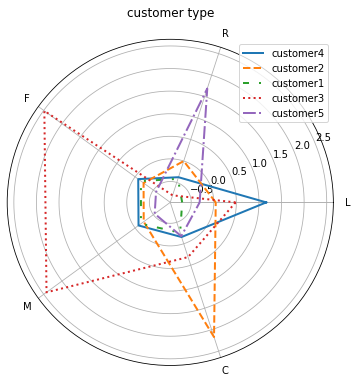

In [24]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111,polar=True)
for i in range(len(kinds)):
    ax.plot(angle,centers[i], linestyle=lstype[i],linewidth=2,label =kinds[i] )

    
ax.set_thetagrids(angle * 180 /np.pi ,labels)
plt.title('customer type')
plt.legend(legen)
plt.show()

# LRFMC
- L （关系长度）= LOAD_TIME - FFP_DATE
- R  (消费的时间间隔）= LAST_TO_END
- F  (消费频率) = FLIGHT_COUNT
- M  (飞行里程) = SEG_KM_SUM
- C  (折扣率的平均值）= avg_discount

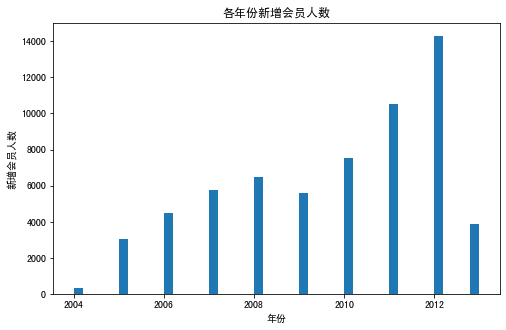

In [28]:
from datetime import datetime
ffp = airline['FFP_DATE'].apply(lambda x : datetime.strptime(x, '%Y/%m/%d'))
ffp_year = ffp.map(lambda x : x.year)

fig = plt.figure(figsize=(8,5))
plt.rcParams['font.sans-serif'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False

plt.hist(ffp_year ,bins= 'auto')

plt.xlabel('年份')
plt.ylabel('新增会员人数')
plt.title('各年份新增会员人数')
plt.show()

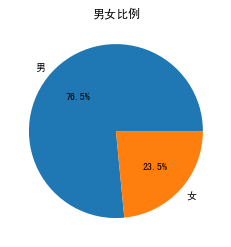

In [29]:
male = pd.value_counts(airline['GENDER'])['男']
female = pd.value_counts(airline['GENDER'])['女']

fig = plt.figure(figsize= (7,4))
plt.pie([male,female], labels=['男','女'] , autopct='%.1f%%')

plt.title('男女比例')
plt.show()

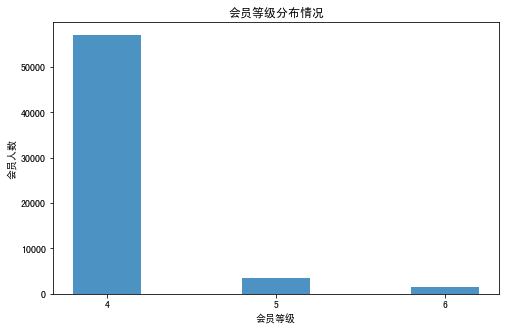

In [30]:
lv_four = pd.value_counts(airline['FFP_TIER'])[4]
lv_five = pd.value_counts(airline['FFP_TIER'])[5]
lv_six = pd.value_counts(airline['FFP_TIER'])[6]

fig = plt.figure(figsize=(8,5))
plt.bar(range(3), height= [lv_four,lv_five,lv_six],width= 0.4,alpha = 0.8)

plt.xticks([index for index in range (3)],['4','5','6'])
plt.xlabel('会员等级')
plt.ylabel('会员人数')
plt.title('会员等级分布情况')
plt.show()
           

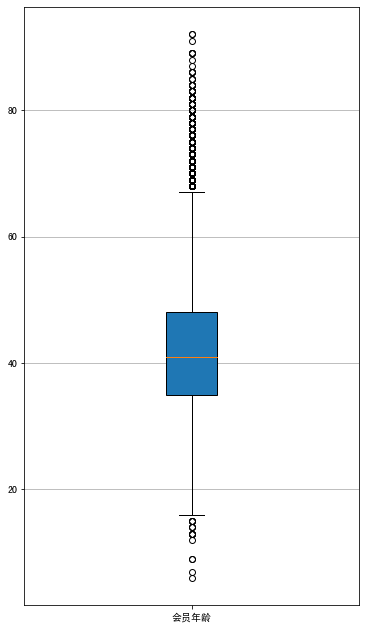

In [33]:
age = airline['AGE'].dropna()
age = age.astype('int64')
fig = plt.figure(figsize=(6,11))
plt.boxplot(age, patch_artist= True,labels=['会员年龄'])

plt.grid(axis='y')
plt.show()

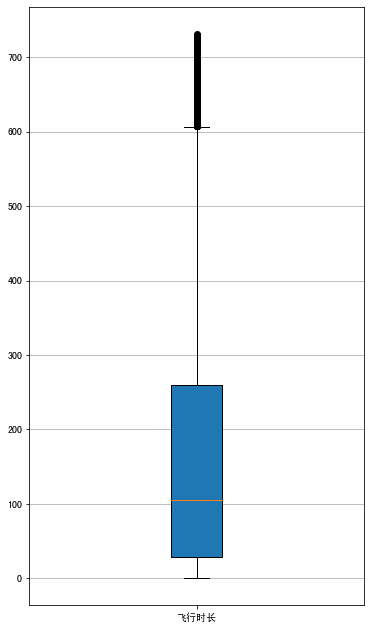

In [35]:
lte = airline['LAST_TO_END']
fig = plt.figure(figsize=(6,11))
plt.boxplot(lte, patch_artist= True,labels=['飞行时长'])

plt.grid(axis='y')
plt.show()

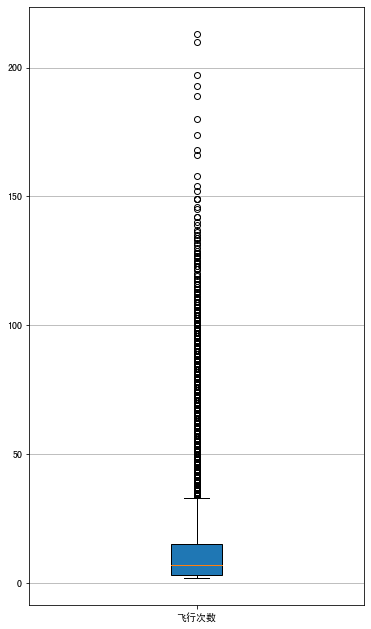

In [36]:
 fc = airline['FLIGHT_COUNT']
fig = plt.figure(figsize=(6,11))
plt.boxplot(fc , patch_artist= True,labels=['飞行次数'])

plt.grid(axis='y')
plt.show()